In [ ]:
#importing the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving iris (4).xls to iris (4).xls


{'iris (4).xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00D\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00C\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff

In [ ]:
#Importing the dataset
data=pd.read_excel("iris (4).xls")  

In [ ]:
data.shape

(150, 5)

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
for i in (['SL','SW','PL']):
  data[i]=data[i].fillna(data[i].median())


In [ ]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
data.shape

(150, 5)

In [ ]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data['Classification'].unique()

array([0, 1, 2])

In [ ]:
corrmetrix=data.corr()

In [ ]:
x=data.drop('Classification',axis=1)
y=data['Classification']

# logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='macro'))

accuracy is 0.9736842105263158
precision is 0.9722222222222222


In [ ]:
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

# knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

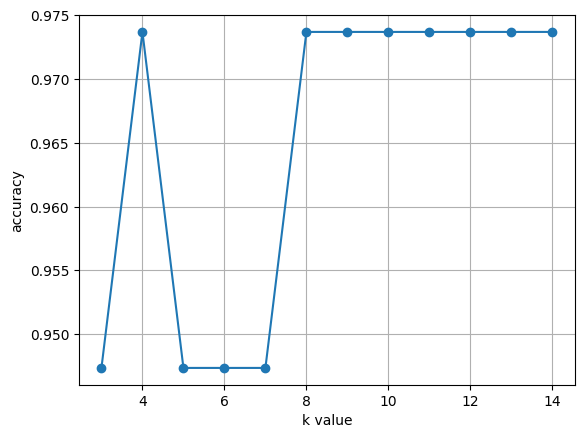

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))

Accuracy is 0.9473684210526315
Precision is 0.9440559440559442


# svm

In [ ]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svmclf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [ ]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=svmclf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9736842105263158


# decision tress

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [ ]:
print('Acuuracy is', accuracy_score(y_test,y_pred))

Acuuracy is 1.0


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf_clf.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [ ]:
rf_clf=RandomForestClassifier(random_state=42,n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=20,
                       random_state=42)

In [ ]:
y_pred=rf_clf.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
